In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [16]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(DecisionTreeClassifier(), k_features=10, forward=True, floating=False, scoring='accuracy', cv=0)
sfs = sfs.fit(X_train, y_train)
X_train_sfs = sfs.transform(X_train)

In [18]:
# Sequential Backward Selection (SBS)
sbs = SequentialFeatureSelector(DecisionTreeClassifier(), k_features=1, forward=False, floating=False, scoring='accuracy', cv=0)
sbs = sbs.fit(X_train, y_train)
X_train_sbs = sbs.transform(X_train)

In [19]:
# Pearson Correlation-Based Feature Selection
p = SelectKBest(score_func=f_classif, k=10)
X_train_p = p.fit_transform(X_train, y_train)

In [20]:
original_feature_count = X_train.shape[1]
sfs_feature_count = X_train_sfs.shape[1]
sbs_feature_count = X_train_sbs.shape[1]
p_feature_count = X_train_p.shape[1]

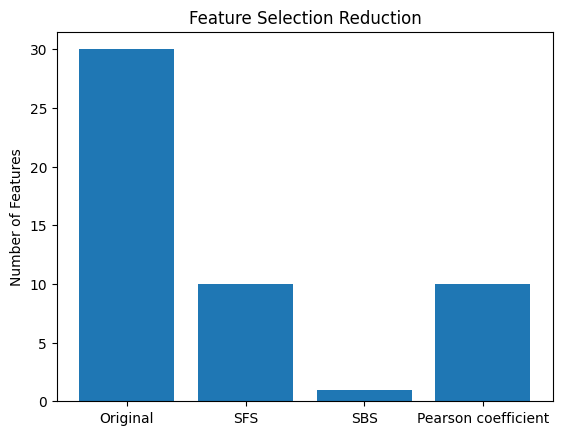

In [21]:
feature_counts = [original_feature_count, sfs_feature_count, sbs_feature_count, p_feature_count]
feature_selection_methods = ['Original', 'SFS', 'SBS', 'Pearson coefficient']
plt.bar(feature_selection_methods, feature_counts)
plt.ylabel('Number of Features')
plt.title('Feature Selection Reduction')
plt.show()